In [30]:
# system libraries
import os
import warnings
  
# ignoring all the warnings
warnings.simplefilter('ignore')
  
# import data handling libraries
import numpy as np
import pandas as pd
  
# importing data visualisation libraires
import matplotlib.pyplot as plt 
%matplotlib inline
  
# import image processing library
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2grey

In [31]:
train_csv_path = "~/Downloads/CheXpert-v1.0-small/train.csv"
train_df = pd.read_csv(train_csv_path)

In [32]:
train_df.head(3)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [33]:
base_path = "~/Downloads"
label_name = "Cardiomegaly"
limit = 1000

In [34]:
def read_image_and_label(df, label_name):
    images = []
    labels = []
    for i in range(len(df)):
        img = imread(os.path.join(base_path, df.loc[i, "Path"]))
        label = df.loc[i, label_name]
        images.append(img)
        labels.append(label)
    return images, labels
        

In [35]:
images, labels = read_image_and_label(train_df.head(limit), label_name)

In [36]:
images[0].shape

(320, 389)

In [37]:
images[0]

array([[  1,   0,  49, ...,   0,   0,   0],
       [  3,   1,  50, ...,   1,   1,   1],
       [  0,   0,  49, ...,   0,   0,   0],
       ...,
       [157, 167, 178, ..., 226, 229, 238],
       [165, 172, 164, ..., 255, 234, 240],
       [176, 198, 163, ..., 245, 232, 230]], dtype=uint8)

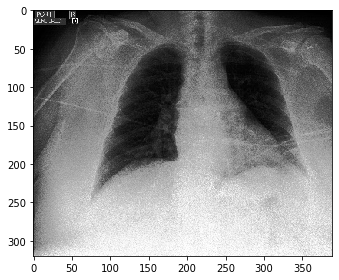

In [38]:
imshow(images[0])

In [39]:
new_img = resize(images[0], (320, 320))

In [40]:
new_img

array([[3.49877451e-03, 6.21507353e-02, 1.92156863e-01, ...,
        1.11457684e-16, 1.11457684e-16, 1.11457684e-16],
       [1.09191176e-02, 6.60723039e-02, 1.96078431e-01, ...,
        3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
       [3.05490927e-16, 6.21507353e-02, 1.98498775e-01, ...,
        2.11397059e-03, 1.09716158e-16, 1.09716158e-16],
       ...,
       [6.19914216e-01, 6.68854167e-01, 6.76899510e-01, ...,
        9.22212010e-01, 8.94234069e-01, 9.29528186e-01],
       [6.50018382e-01, 6.64362745e-01, 6.57935049e-01, ...,
        9.87316176e-01, 9.44283088e-01, 9.38639706e-01],
       [6.99497549e-01, 7.32077206e-01, 6.75153186e-01, ...,
        9.54442402e-01, 9.26292892e-01, 9.02806373e-01]])

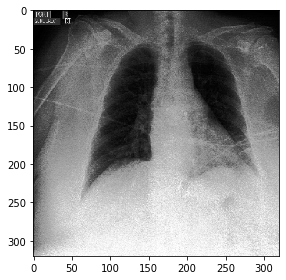

In [41]:
imshow(new_img)

In [42]:
#  Flattening and Reshaping the data.
def resize_and_flatten(images, size=(320, 320)):
    result = []
    for img in images:
        new_img = resize(img, size)
        flatted = np.ndarray.flatten(new_img)
        result.append(flatted)
    return result

In [43]:
flat_images = resize_and_flatten(images)

In [44]:
def create_dataframe(images, labels):
    df1 = pd.DataFrame(images)
    df2 = pd.DataFrame(labels, columns=["label"])
    return pd.concat([df1, df2], axis=1)


In [45]:
image_df = create_dataframe(flat_images, labels)

In [51]:
image_df['label'] = image_df['label'].fillna(0)

In [52]:
image_df

,0,1,2,3,4,5,6,7,8,9,...,102391,102392,102393,102394,102395,102396,102397,102398,102399,label
0,0.003499,6.215074e-02,0.192157,0.198076,0.184779,0.194620,0.188235,0.193076,0.202610,0.185263,...,0.943082,0.848897,0.923701,0.986777,0.943002,0.892788,0.954442,0.926293,0.902806,0.0
1,0.080637,7.052696e-02,0.082721,0.068260,0.066605,0.051042,0.069975,0.066973,0.076225,0.069975,...,0.405576,0.422733,0.428493,0.411029,0.419914,0.444730,0.464522,0.456127,0.475429,-1.0
2,0.048775,6.917892e-02,0.073775,0.078676,0.093934,0.120221,0.227757,0.313113,0.321569,0.336336,...,0.361887,0.364400,0.363664,0.365502,0.364890,0.373713,0.362929,0.366054,0.347672,0.0
3,0.840993,7.504289e-01,0.702880,0.656679,0.669792,0.683762,0.651042,0.628860,0.622304,0.562071,...,0.176471,0.179963,0.183456,0.183885,0.176471,0.176471,0.157292,0.161213,0.569485,0.0
4,0.006985,5.938605e-16,0.004289,0.013848,0.004105,0.003186,0.012377,0.005331,0.010662,0.011152,...,0.028615,0.007537,0.006801,0.018015,0.027206,0.014522,0.037745,0.070711,0.085417,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.528064,5.490196e-01,0.549020,0.642096,0.581801,0.702022,0.767279,0.860417,0.874510,0.902819,...,0.150061,0.181801,0.179779,0.170221,0.176532,0.179473,0.187132,0.200000,0.210478,0.0
996,0.043137,4.313725e-02,0.039216,0.039216,0.039216,0.039216,0.035294,0.035294,0.035294,0.035294,...,0.478431,0.490196,0.427451,0.372549,0.325490,0.274510,0.172549,0.117647,0.101961,0.0
997,0.322488,3.218873e-01,0.339393,0.331250,0.330650,0.317065,0.327629,0.322806,0.333670,0.319185,...,0.220809,0.204522,0.189136,0.163805,0.159583,0.144798,0.153241,0.153842,0.156562,0.0
998,0.934375,5.323529e-01,0.284069,0.065809,0.005821,0.003370,0.000000,0.000000,0.000000,0.000000,...,0.996078,0.999326,1.000000,0.996630,1.000000,1.000000,1.000000,0.996998,0.996078,0.0


In [53]:
x = image_df.values[:, :-1]
y = image_df.values[:, -1]

In [54]:
from sklearn.decomposition import PCA                   
from sklearn.svm import SVC                             
from sklearn.pipeline import make_pipeline              
from sklearn.model_selection import train_test_split    
from sklearn.model_selection import GridSearchCV        
from sklearn import metrics                           
  
# Here we will use train_test_split to create our training and testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
  
pca = PCA(n_components = 150, whiten = True, random_state = 0)
svc = SVC(kernel ='rbf', class_weight ='balanced')
model = make_pipeline(pca, svc)
  
params = {'svc__C': [x for x in range(1, 6)],
          'svc__gamma': [0.001, 0.005, 0.006, 0.01, 0.05, 0.06, 0.004, 0.04]}
  
grid = GridSearchCV(model, params)
%time grid.fit(x_train, y_train)
print(grid.best_params_)
  
model = grid.best_estimator_
ypred = model.predict(x_test)
  
ypred[0:3]

CPU times: user 1h 13min 35s, sys: 6min 34s, total: 1h 20min 9s
Wall time: 20min 42s
{'svc__C': 1, 'svc__gamma': 0.05}


array([0., 0., 0.])

80.80000000000001


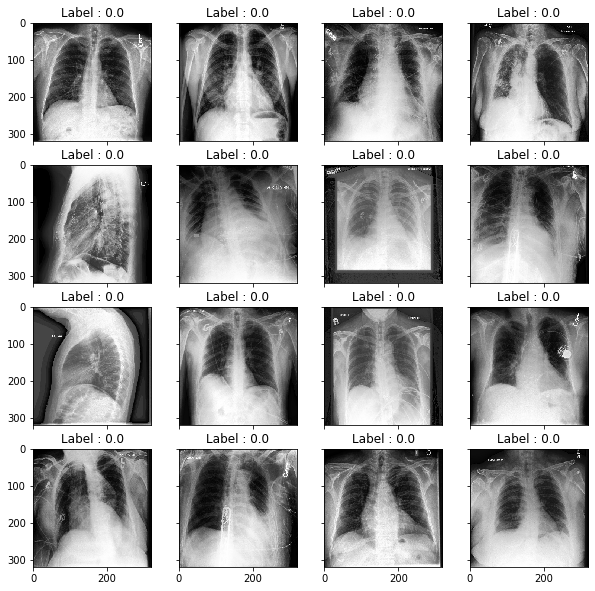

In [57]:
fig, ax = plt.subplots(4, 4, sharex = True, 
                             sharey = True, 
                        figsize = (10, 10))
  
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape((320, 320)).astype(np.float64),
                   cmap = "gray", interpolation = "nearest")
  
    axi.set_title('Label : {}'.format(ypred[i]))
      
# Finally, we test our accuracy in using the following code:
print(metrics.accuracy_score(y_test, ypred) * 100)